## Extreme event categorising based on image clustering

https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34/

In [1]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


2025-08-12 10:17:01.806083: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import glob

In [23]:
exp = '2015_2034_precip_5'

In [24]:
path = f"/div/nac/users/zofias/plots/XXN/{exp}/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
maps = glob.glob(f'*.png')

In [25]:
maps

['precip_5_r10_2023-07-06_62.67_10.0_2015_2034.png',
 'precip_5_r10_2062-01-17_67.38_13.75_2015_2034.png',
 'precip_5_r11_2019-07-12_69.27_21.88_2015_2034.png',
 'precip_5_r11_2081-08-05_70.21_28.12_2015_2034.png',
 'precip_5_r11_2095-12-29_59.84_8.75_2015_2034.png',
 'precip_5_r1_2060-07-09_61.73_10.0_2015_2034.png',
 'precip_5_r1_2072-06-15_69.27_23.75_2015_2034.png',
 'precip_5_r1_2081-08-01_69.27_29.38_2015_2034.png',
 'precip_5_r12_2027-07-26_69.74_24.38_2015_2034.png',
 'precip_5_r12_2078-11-10_60.16_10.42_2015_2034.png',
 'precip_5_r13_2025-01-01_61.73_6.88_2015_2034.png',
 'precip_5_r13_2042-01-31_62.67_6.25_2015_2034.png',
 'precip_5_r13_2076-07-29_61.73_10.0_2015_2034.png',
 'precip_5_r13_2086-11-09_60.79_11.25_2015_2034.png',
 'precip_5_r13_2096-08-19_70.21_28.75_2015_2034.png',
 'precip_5_r14_2050-08-03_70.21_29.38_2015_2034.png',
 'precip_5_r14_2094-08-17_60.79_10.0_2015_2034.png',
 'precip_5_r14_2096-09-18_60.79_11.25_2015_2034.png',
 'precip_5_r15_2045-09-15_68.32_18.75_

In [26]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [27]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    #print(features.shape)
    return features

In [28]:
data = {}
p = r"/div/nac/users/zofias/plots/XXN/graph_features.pkl"

# loop through each image in the dataset
for graph in maps:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(graph,model)
        data[graph] = feat
        
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
            
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('maps_labels.csv')
#label = df['label'].tolist()
#unique_labels = list(set(label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
#save the features
np.save(f"{path}/imageclustering_{exp}.npy", feat)

In [30]:
# reduce the amount of dimensions in the feature vector
pca = PCA(n_components=20, random_state=11)
pca.fit(feat)
x = pca.transform(feat)

In [31]:
#save the processed data
np.save(f"{path}/imageclustering_{exp}_processed_portrait.npy", x)

## Clustering

In [32]:
# load the processed data

#this is the data that looks like the 4000m 
#x = np.load(path+'imageclustering2000m_processed.npy')

#this is the data that is in portrait format
x = np.load(f"{path}/imageclustering_{exp}_processed_portrait.npy")


Text(0, 0.5, 'Sum of squared distance')

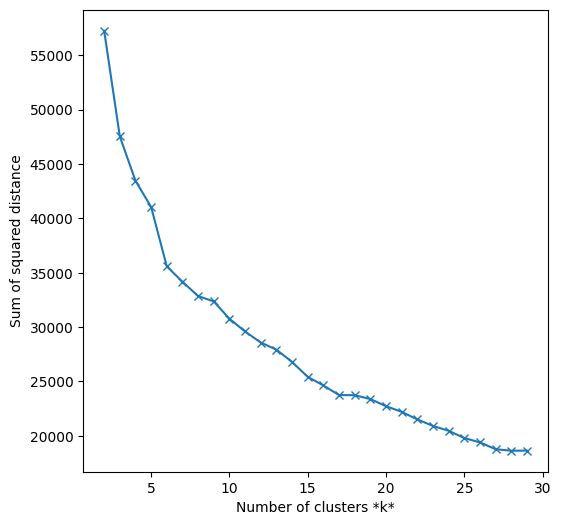

In [33]:
sse = []
list_k = list(range(2, 30))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker="x")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
#plt.ylim(0,)

In [ ]:
#change n_clusters to determine number of categories
kmeans = KMeans(n_clusters=4,random_state=7)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
        
for i in range(len(groups)):
    print(len(groups[i]))

21
63
39
29


In [35]:
groups[0]

[np.str_('precip_5_r10_2023-07-06_62.67_10.0_2015_2034.png'),
 np.str_('precip_5_r13_2025-01-01_61.73_6.88_2015_2034.png'),
 np.str_('precip_5_r13_2042-01-31_62.67_6.25_2015_2034.png'),
 np.str_('precip_5_r18_2034-02-01_62.67_7.5_2015_2034.png'),
 np.str_('precip_5_r2_2078-01-21_62.67_6.25_2015_2034.png'),
 np.str_('precip_5_r25_2073-03-12_62.67_8.75_2015_2034.png'),
 np.str_('precip_5_r27_2068-08-02_66.44_15.0_2015_2034.png'),
 np.str_('precip_5_r27_2075-03-20_63.61_9.38_2015_2034.png'),
 np.str_('precip_5_r28_2070-01-18_62.67_7.5_2015_2034.png'),
 np.str_('precip_5_r29_2045-02-10_62.67_7.5_2015_2034.png'),
 np.str_('precip_5_r29_2062-07-15_69.27_20.0_2015_2034.png'),
 np.str_('precip_5_r30_2049-12-27_62.67_6.25_2015_2034.png'),
 np.str_('precip_5_r31_2093-11-19_62.29_7.25_2015_2034.png'),
 np.str_('precip_5_r33_2078-07-23_64.55_11.25_2015_2034.png'),
 np.str_('precip_5_r36_2015-10-27_62.67_6.25_2015_2034.png'),
 np.str_('precip_5_r4_2027-01-25_63.61_8.75_2015_2034.png'),
 np.str_('pr

In [36]:
# function that lets you view a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 50 images to be shown at a time
    if len(files) > 50:
        print(f"Clipping cluster size from {len(files)} to 50")
        files = files[:49]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

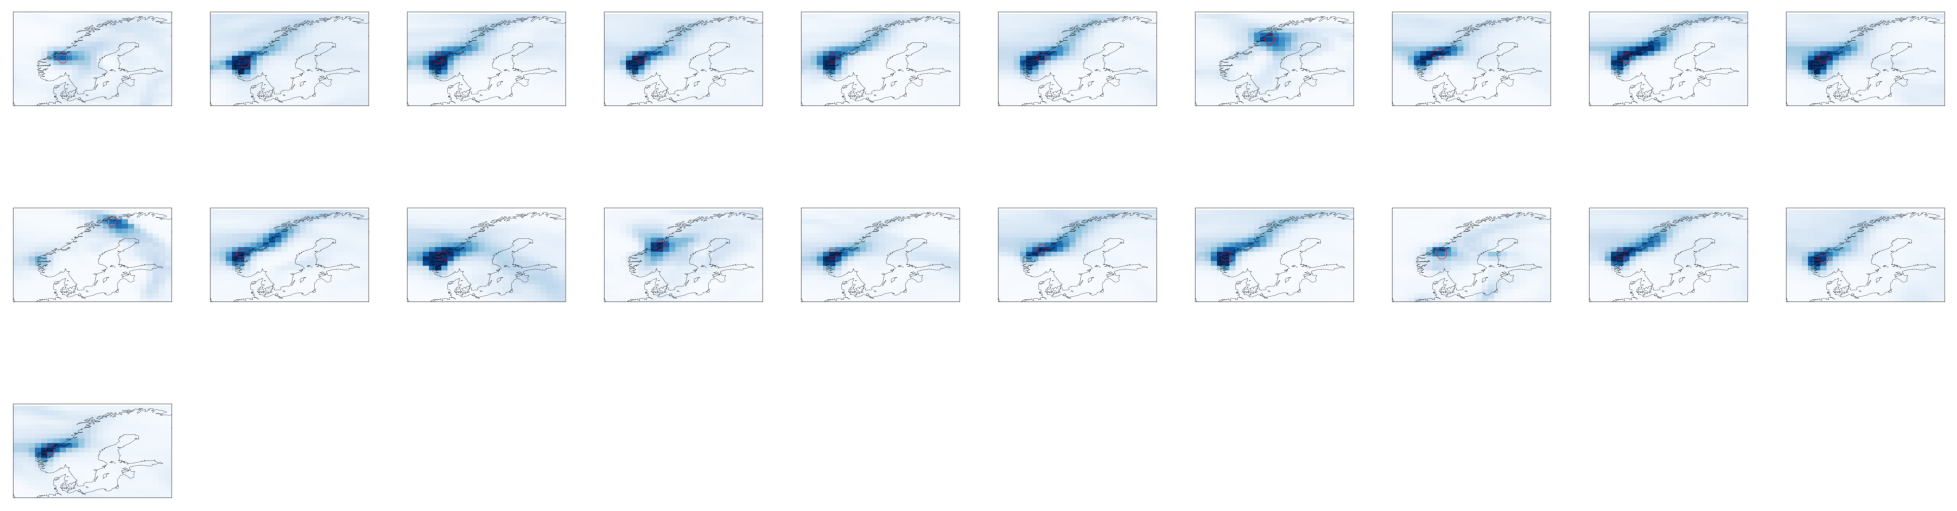

In [37]:
view_cluster(0)

Clipping cluster size from 63 to 50


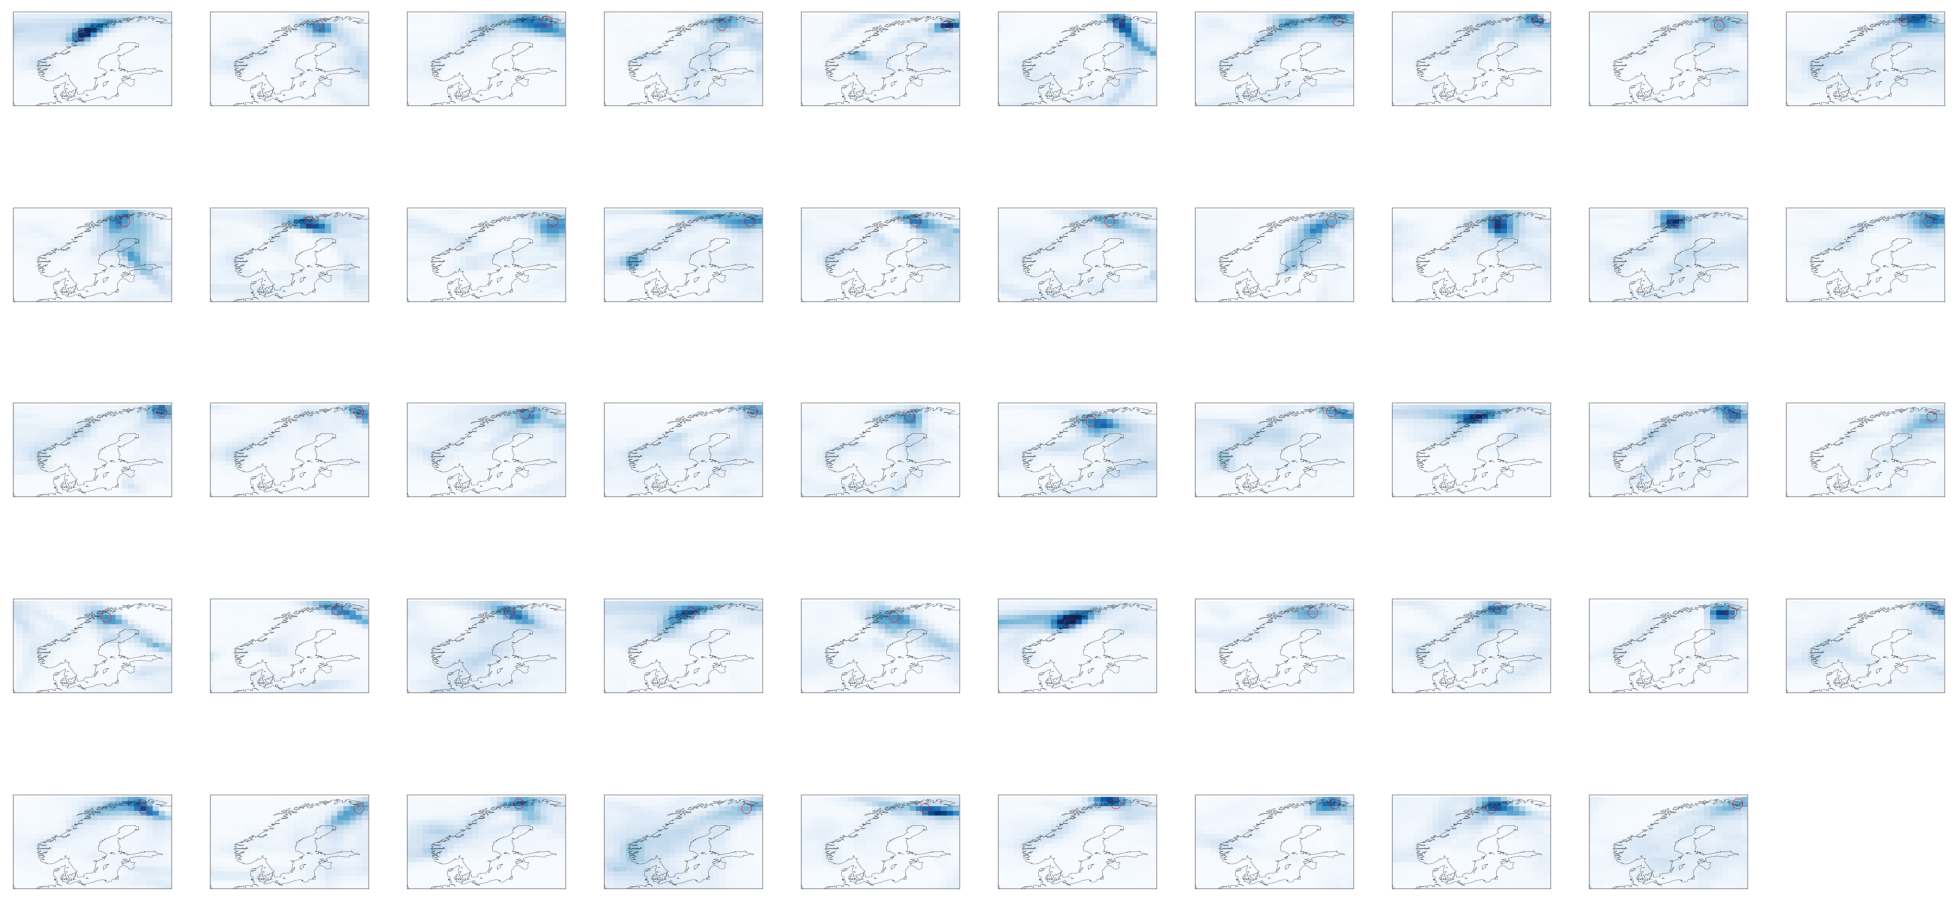

In [38]:
view_cluster(1)

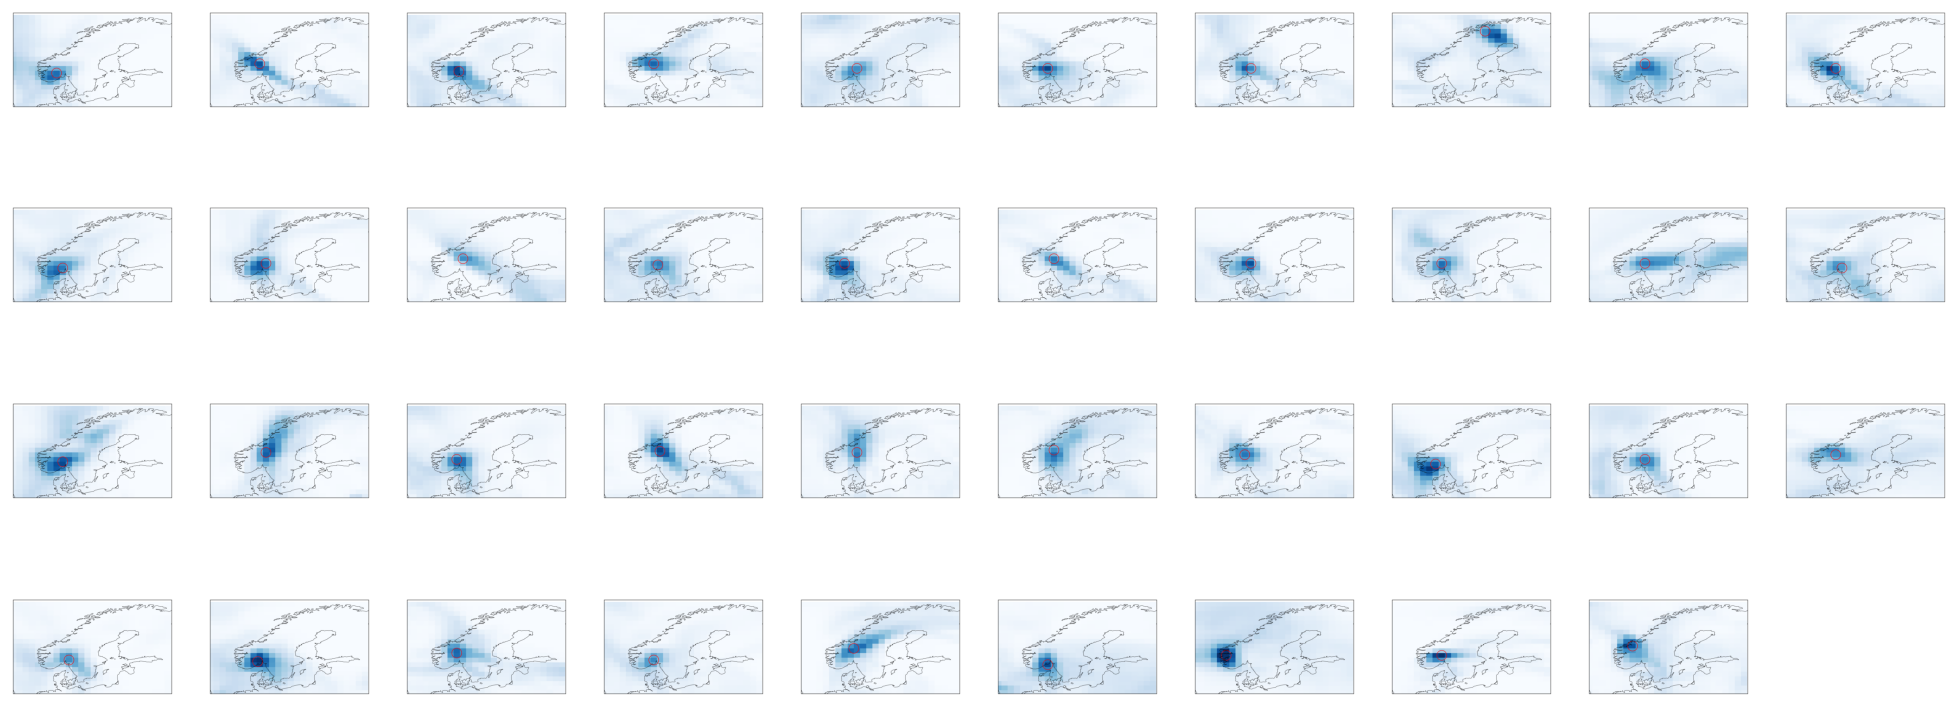

In [39]:
view_cluster(2)

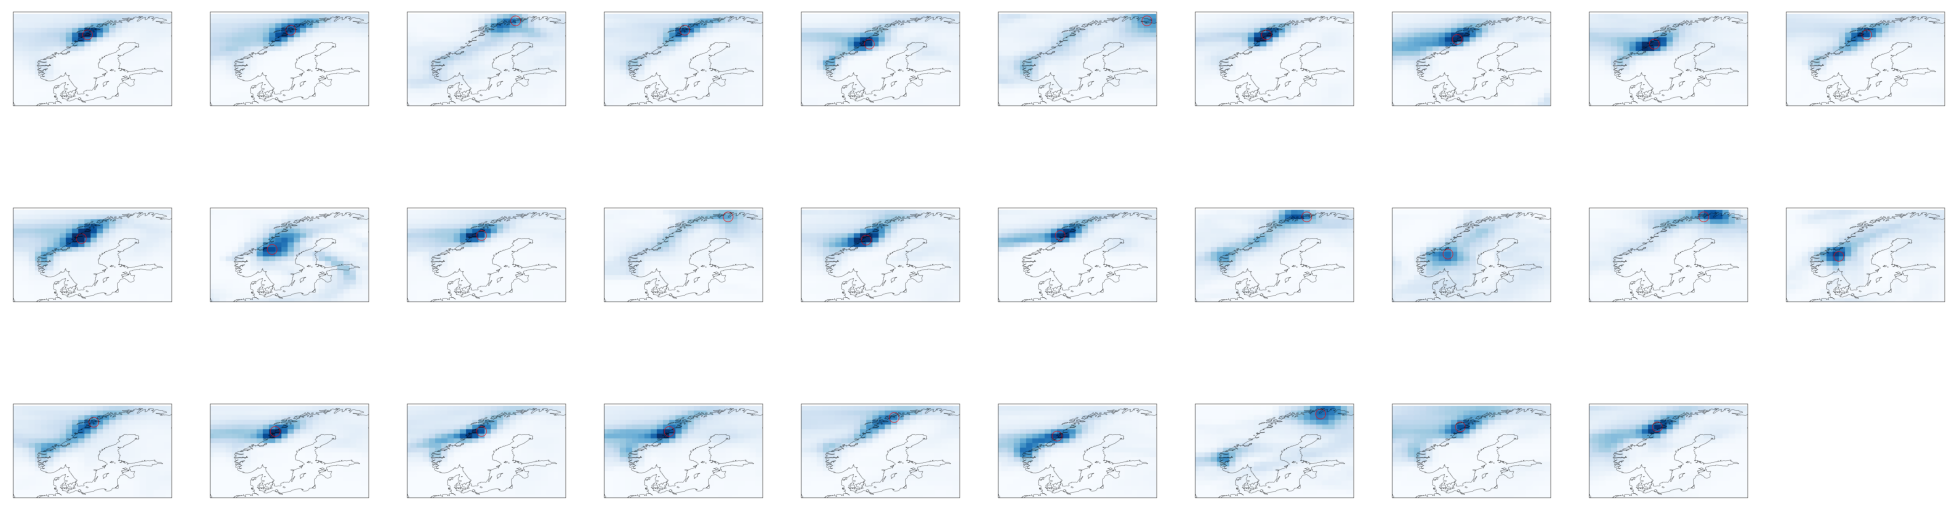

In [40]:
view_cluster(3)

In [22]:
view_cluster(4)

KeyError: 4

<Figure size 2500x2500 with 0 Axes>